# Model

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sns.set_theme()

## Load data

In [3]:
df = pd.read_pickle('../data/data.pkl') 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17520 entries, 2022-01-01 01:00:00 to 2024-01-01 00:00:00
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   solar          17520 non-null  int64  
 1   wind_offshore  17520 non-null  int64  
 2   wind_onshore   17520 non-null  int64  
 3   total_load     17520 non-null  int64  
 4   price          17520 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 821.2 KB


In [ ]:
# import pandas as pd

# # Assume df has a datetime index and a column 'value' for the hourly data
# df['prev_day'] = df['value'].shift(24)      # Previous day (24-hour lag)
# df['prev_3_days'] = df['value'].shift(72)   # 3 days (72-hour lag)
# df['prev_5_days'] = df['value'].shift(120)  # 5 days (120-hour lag)
# df['prev_7_days'] = df['value'].shift(168)  # 7 days (168-hour lag)

# # Check the resulting DataFrame
# print(df.head(10))

## Train Test Split

In [5]:
# Extract year and month from the timestamp for filtering
df['year'] = df.index.year
df['month'] = df.index.month

# Filter for only the years 2022 and 2023
df = df[(df['year'] >= 2022) & (df['year'] <= 2023)]

# Identify the last seven days of each month
df['day'] = df.index.day
df['last_seven_days'] = df.groupby(['year', 'month'])['day'].transform(lambda x: x >= (x.max() - 6))

# Split into training and test sets
train_df = df[~df['last_seven_days']].drop(columns=['year', 'month', 'day', 'last_seven_days'])
test_df = df[df['last_seven_days']].drop(columns=['year', 'month', 'day', 'last_seven_days'])

# Check the resulting splits
print("Training set:\n", train_df.head())
print("Test set:\n", test_df.head())

Training set:
                      solar  wind_offshore  wind_onshore  total_load   price
Date                                                                       
2022-01-01 01:00:00      0           5411         10585       46129  124.70
2022-01-01 02:00:00      0           5230          9679       44340  124.70
2022-01-01 03:00:00      0           4939          8647       43222  134.00
2022-01-01 04:00:00      0           4517          7819       42705   58.80
2022-01-01 05:00:00      0           4176          6827       42576   37.67
Test set:
                      solar  wind_offshore  wind_onshore  total_load   price
Date                                                                       
2022-01-25 00:00:00      0             84           111       52539  200.00
2022-01-25 01:00:00      0            133           167       50771  210.26
2022-01-25 02:00:00      0            117           177       49635  212.90
2022-01-25 03:00:00      0            116           201       

In [19]:
len(train_df)

13487

In [20]:
len(test_df)

4032

In [6]:
df.drop(columns = ['year', 'month','day','last_seven_days'], inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17519 entries, 2022-01-01 01:00:00 to 2023-12-31 23:00:00
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   solar          17519 non-null  int64  
 1   wind_offshore  17519 non-null  int64  
 2   wind_onshore   17519 non-null  int64  
 3   total_load     17519 non-null  int64  
 4   price          17519 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 821.2 KB


## Processing

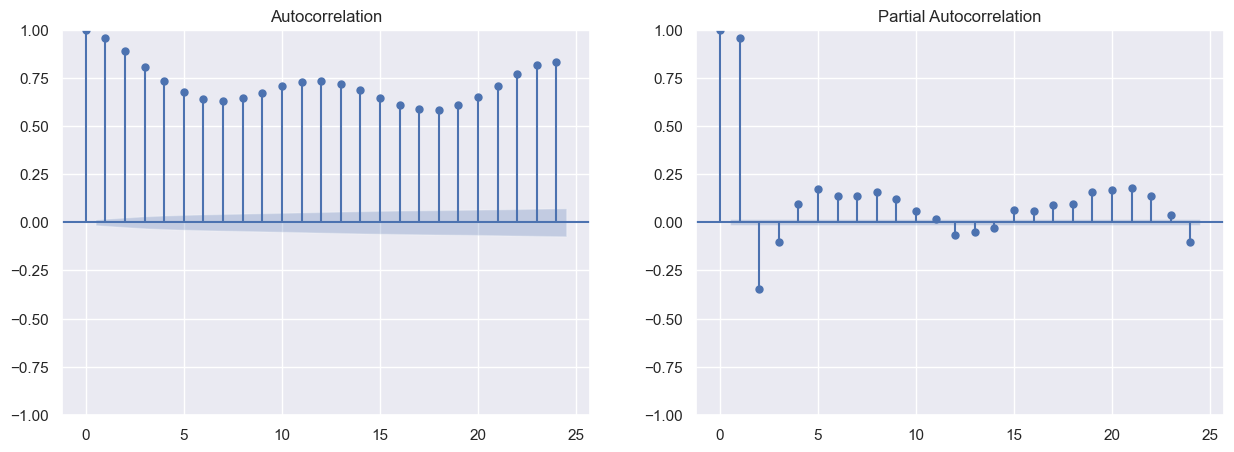

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming df has a datetime index and 'value' is the target column
y = df['price']

# Plot ACF and PACF for weekly lags
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plot_acf(y, lags=24, ax=axes[0])  # ACF up to 1 week (168 hours)
plot_pacf(y, lags=24, ax=axes[1])  # PACF up to 1 week (168 hours)
plt.show()

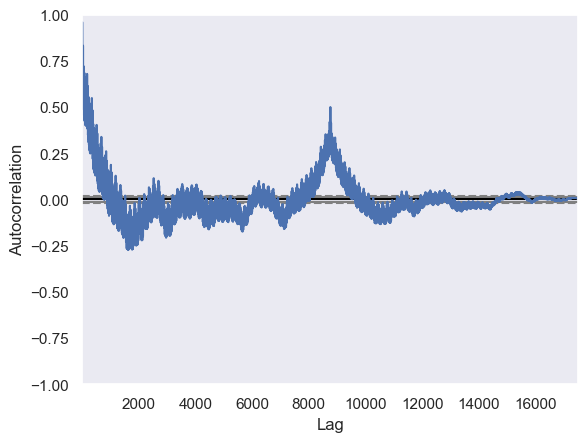

<Figure size 640x480 with 0 Axes>

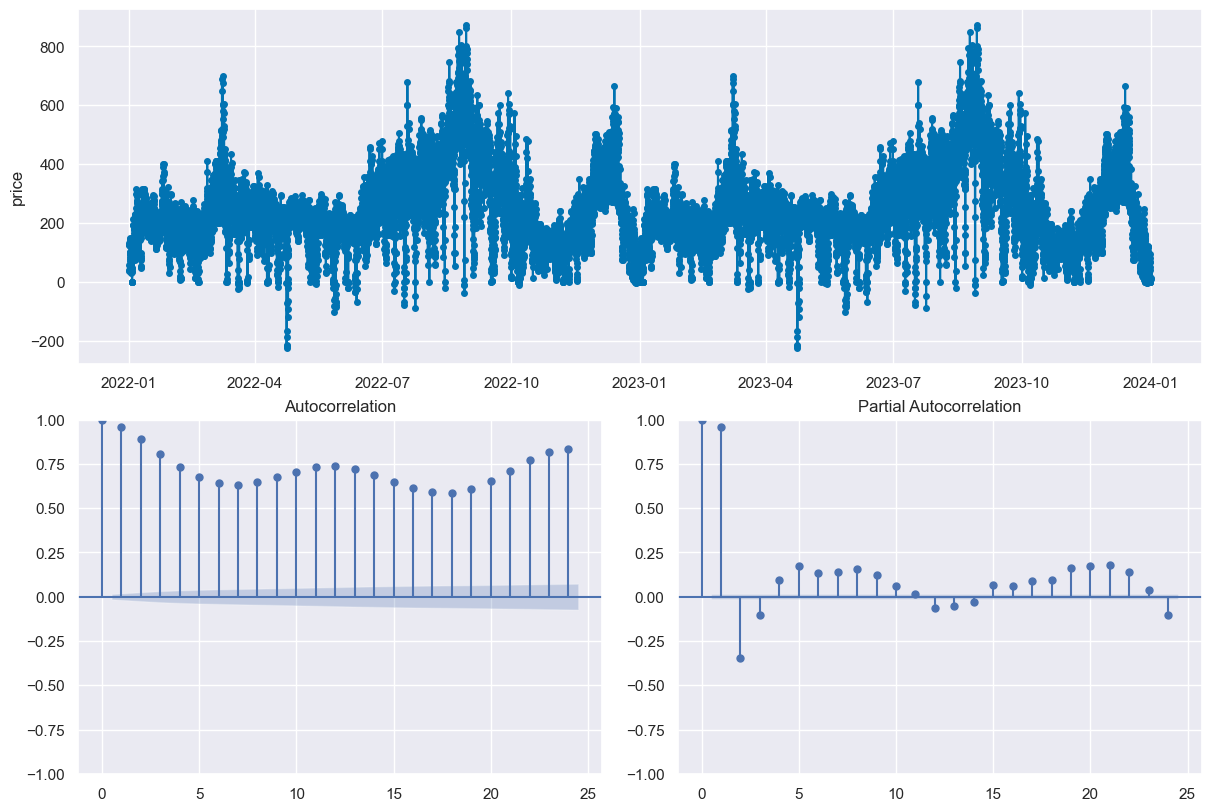

In [9]:
from scipy.fftpack import fft
from pandas.plotting import autocorrelation_plot
from sktime.utils.plotting import plot_correlations
import pandas as pd

import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
%matplotlib inline 

autocorrelation_plot(df['price'])

# use the sktime autocorrelation 
plt.figure()
fig, ax = plot_correlations(pd.Series(df['price']))  


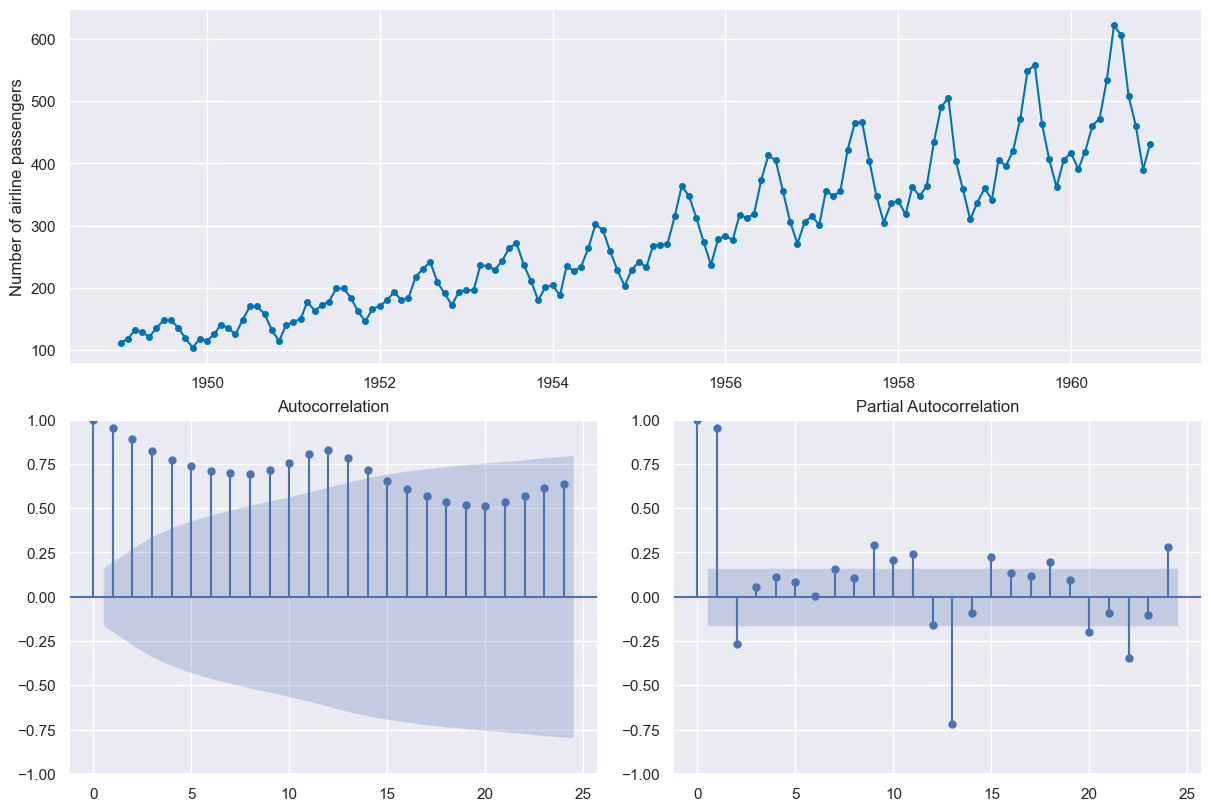

In [10]:
from sktime.utils.plotting import plot_correlations
from sktime.datasets import load_airline
y = load_airline()
fig, ax = plot_correlations(y)  

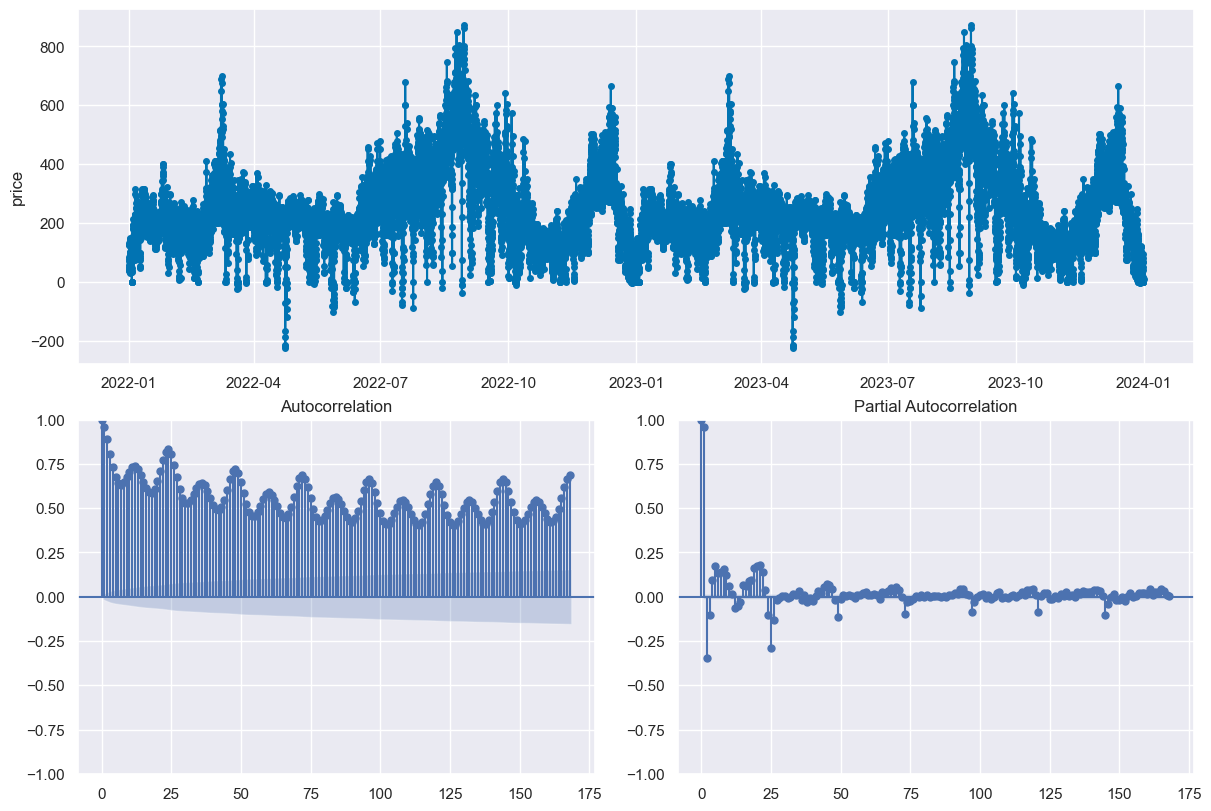

In [34]:
fig, ax = plot_correlations(df['price'], lags = 24*7)  

In [11]:
pd.Series(df['price'])

2022-01-01 01:00:00    124.70
2022-01-01 02:00:00    124.70
2022-01-01 03:00:00    134.00
2022-01-01 04:00:00     58.80
2022-01-01 05:00:00     37.67
                        ...  
2023-12-31 19:00:00     82.35
2023-12-31 20:00:00     67.01
2023-12-31 21:00:00     40.50
2023-12-31 22:00:00     14.89
2023-12-31 23:00:00      9.94
Name: price, Length: 17519, dtype: float64

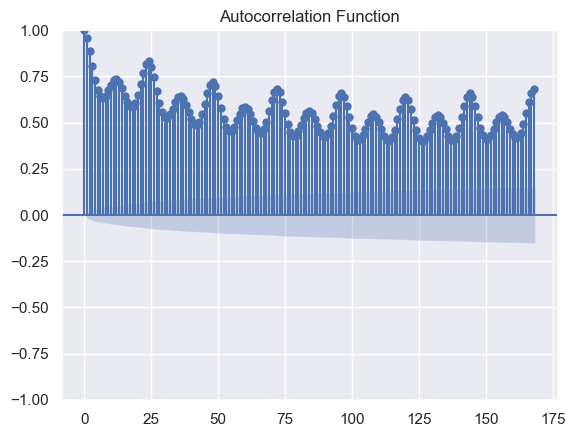

In [12]:
# Assuming 'y' is your time series data
plot_acf(df['price'],lags = 24 * 7)
plt.title("Autocorrelation Function")
plt.show()

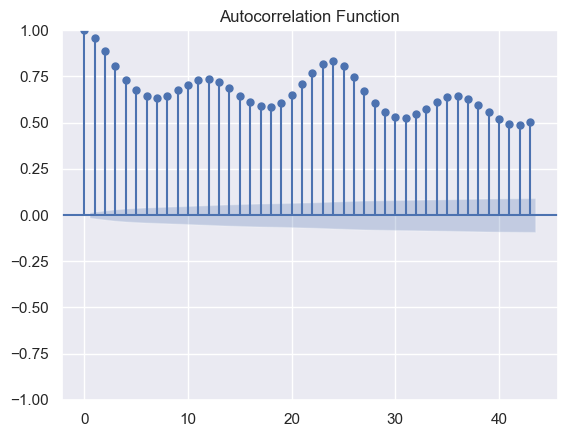

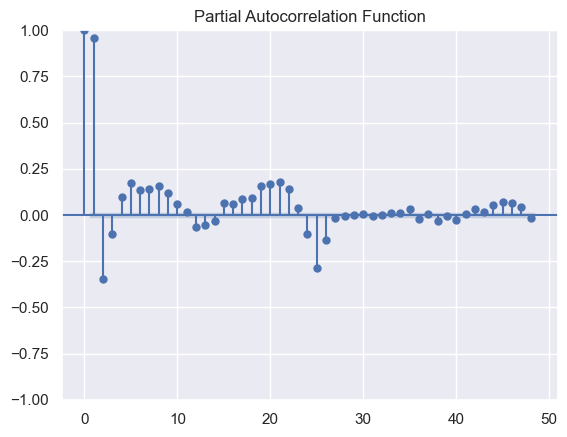

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'y' is your time series data
plot_acf(df['price'])
plt.title("Autocorrelation Function")
plt.show()

plot_pacf(y, lags=48)
plt.title("Partial Autocorrelation Function")
plt.show()

(<Figure size 1200x800 with 3 Axes>,
 array([<Axes: ylabel='price'>,
        <Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

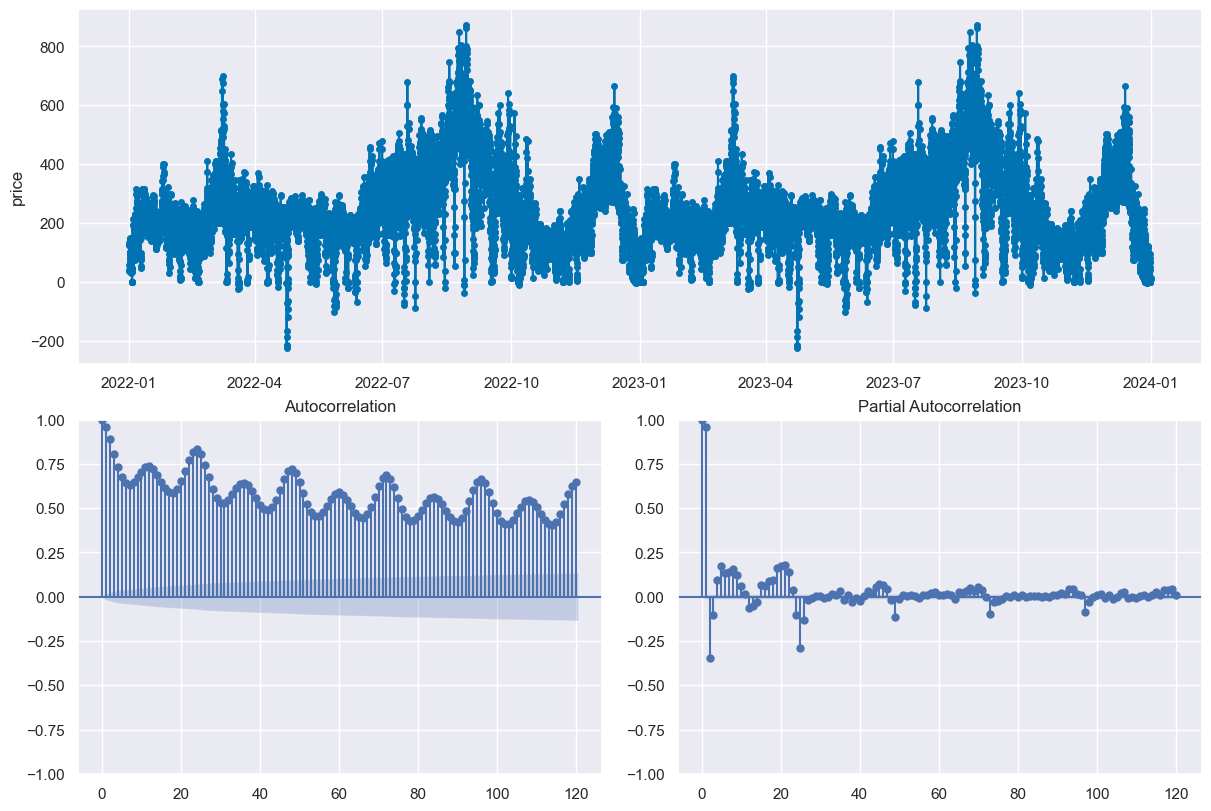

In [13]:
plot_correlations(df['price'], lags = 120) 

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
result = seasonal_decompose(df['price'], model='additive', period=24)  #

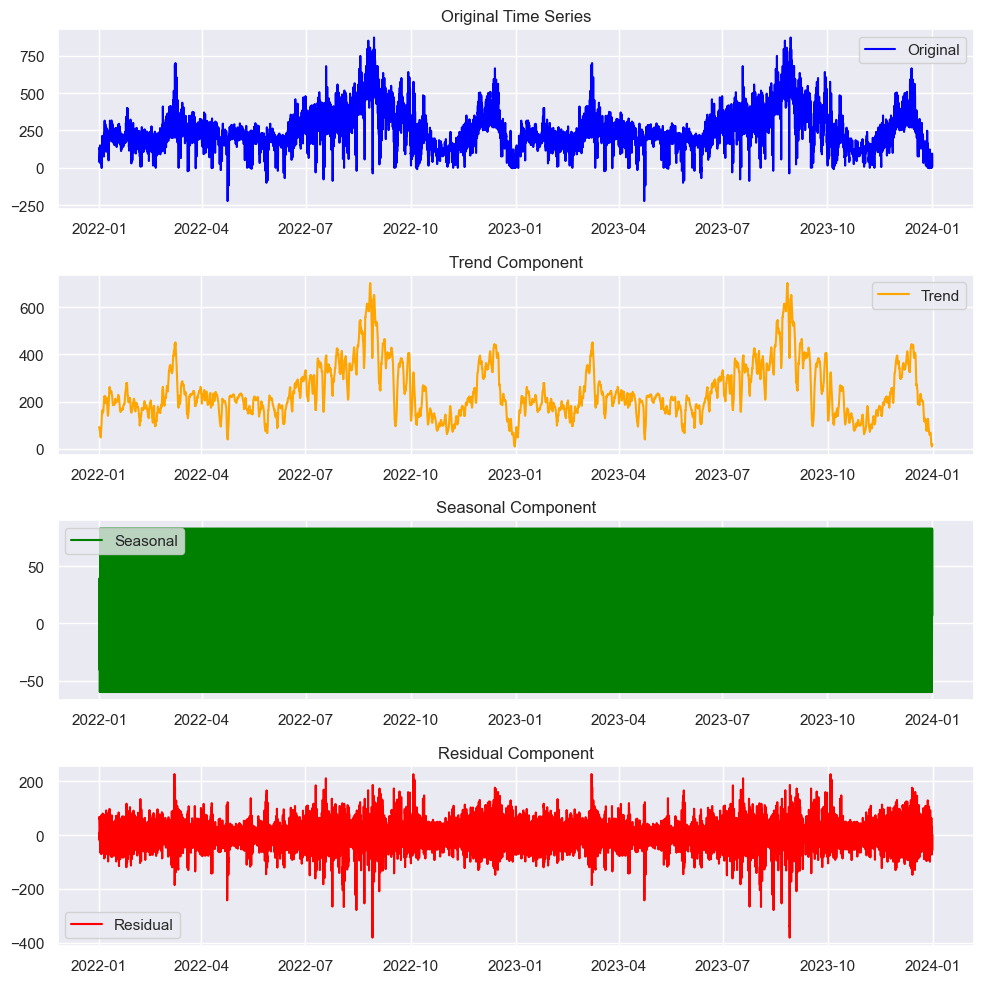

In [18]:
# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 10))

# Original Time Series
ax1.plot(df['price'], label='Original', color='blue')
ax1.set_title('Original Time Series')
ax1.legend()

# Trend Component
ax2.plot(result.trend, label='Trend', color='orange')
ax2.set_title('Trend Component')
ax2.legend()

# Seasonal Component
ax3.plot(result.seasonal, label='Seasonal', color='green')
ax3.set_title('Seasonal Component')
ax3.legend()

# Residual Component
ax4.plot(result.resid, label='Residual', color='red')
ax4.set_title('Residual Component')
ax4.legend()

plt.tight_layout()
plt.show()
